# Elliptic Curve By Example

[Edward Lu](https://github.com/edwardlu71/notebooks)


In [1]:
%display latex
import numpy as np

## Origination of Elliptic Curve

_Elliptic Curve is not Ellipse_

In a rectangle we have 
$$ c^2 = a^2+b^2 $$

how do we find all the interger solutions? for example (3,4,5)

the problem is equivlent to find out $(a,b,c) \in QQ$ when normalizing the area $1/2ab = 1$. QQ denotes rational field

<div>
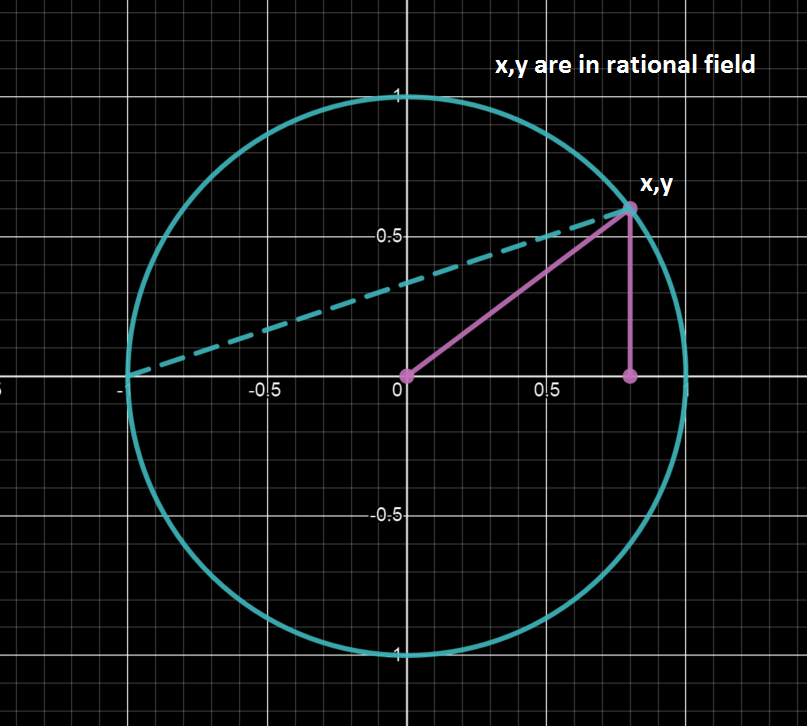
</div>

let $\large x=\frac{a}{c}$ and $\large y=\frac{b}{c}$ and $\large \frac{y}{x+1}=t$ where $(x,y,t) \in QQ$

we have

$$ \begin{align} x & = \frac{1-t^2}{1+t^2} \\
y & = \frac{2t}{1+t^2}
\end{align} $$

as $1/2ab = 1$,  we have

$$(\frac{t^2+1}{c})^2 = -t^3 + t$$

let $Y = \large \frac{t^2+1}{c}$ and $X=-t$, where $X,Y \in QQ$, the equation is transformed into the format that we call it a simple Elliptic Curve equation

$$ Y^2 = X^3 -X $$


## General form of Elliptic Curve & the commonly used form

In [2]:
var('a1 a2 a3 a4 a6')
# generic form of Elliptic Curve
E = EllipticCurve([a1,a2,a3,a4,a6]);print(E)
# commonly used
E = EllipticCurve([a4,a6]);print(E)

Elliptic Curve defined by y^2 + a1*x*y + a3*y = x^3 + a2*x^2 + a4*x + a6 over Symbolic Ring
Elliptic Curve defined by y^2 = x^3 + a4*x + a6 over Symbolic Ring


## Geometric Meaning

giving a line intercepting with the elliptic curve on **rational** points P, Q, R'

$$ \begin{align} y^2 & = x^{3} + a_{4} x + a_{6} \\
y & = \lambda x + \beta
\end{align} $$

we have

$$ x^{3} - \lambda^{2} x^{2} + {\left(a_{4} - 2 \, \lambda \beta \right)} x + a_{6} - \beta^{2} = 0 $$

According to [Viete's Formula](https://en.wikipedia.org/wiki/Vieta%27s_formulas), the sum of 3 roots has the relation below

$$ x_{1} + x_{2} + x_{3} = \lambda^{2} $$

so from the **definition** of $P(x_1, y_1)$ + $Q(x_2, y_2)$ = $R(x_3, y_3)$, we have

$$ \begin{align} \lambda & = \frac{y_2-y_1}{x_2-x_1} \\
x_{3} & = \lambda^2 - x_{1} - x_{2} \\
y_{3} & = \lambda(x_{1} - x_{3}) - y_{1}
\end{align} $$

when $P=Q$, we also have the tangent line for $\lambda$

$$ \lambda = \frac{dy}{dx} = \frac{3x^2+a_4}{2y} $$


## Example

<div>
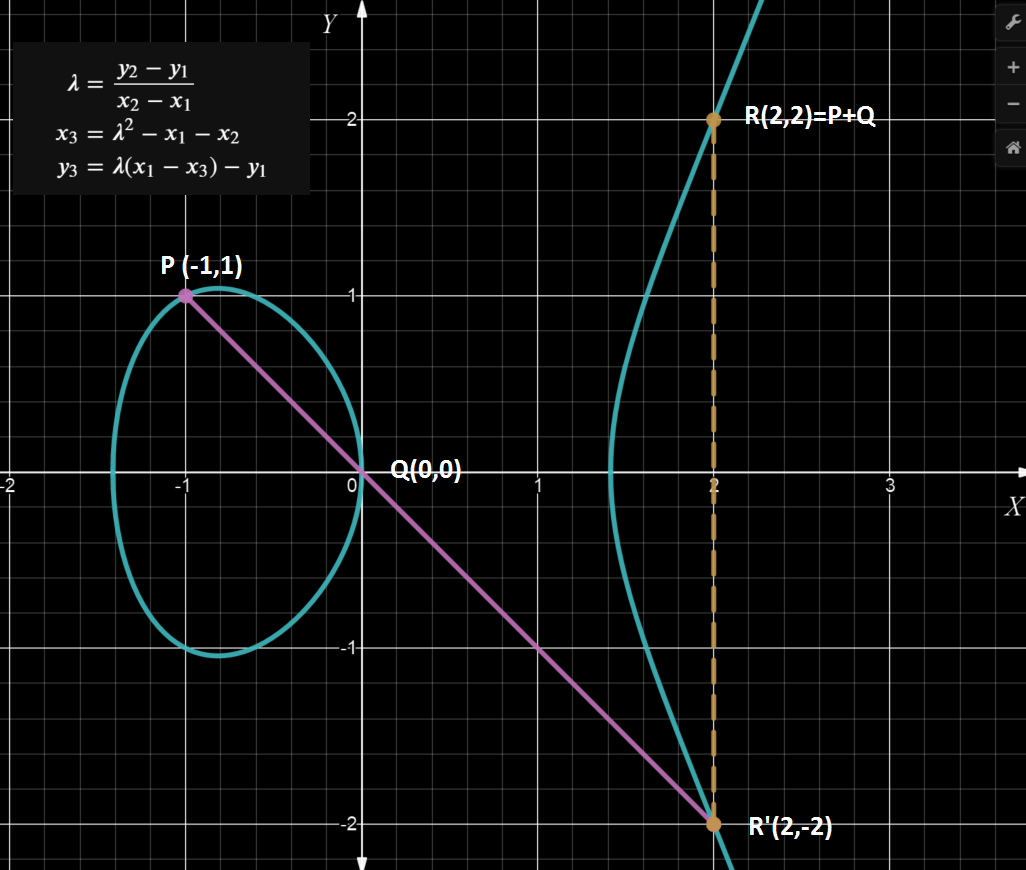
</div>


In [3]:
a4 = -2; a6=0
E20 = EllipticCurve([a4,a6]);print(E20)

P = E20(-1,1)
Q = E20(0,0)
R = P+Q

print(f"P={P[:-1]}, Q={Q[:-1]}, R={R[:-1]}")

# Calculate 2P manually at (-1,1)
x1 = P[0]; y1 = P[1]
𝜆 = (3*x1**2+a4)/2/y1
# P + P
x3 = 𝜆**2 - 2*x1
y3 = 𝜆*(x1-x3)-y1
print("𝜆=",𝜆," x3=",x3," y3=",y3)

# calculate 8*P
P8=8*P
print(P8[:-1])

# what's the difficulty to reverse engineering?
# giving P8 on P, mathematically it's difficult to find n=8

# commutative

print(4*(3*P) == 3*(4*P))

Elliptic Curve defined by y^2 = x^3 - 2*x over Rational Field
P=(-1, 1), Q=(0, 0), R=(2, 2)
𝜆= 1/2  x3= 9/4  y3= -21/8
(68970122119586689/22875209739998784, -15996928681879073722729151/3459773175236858805437952)
True


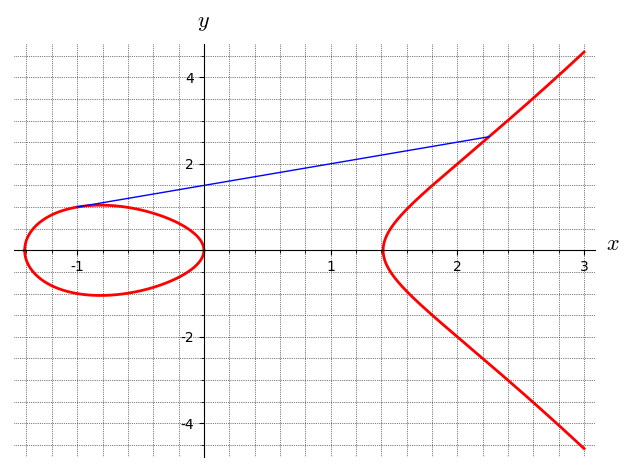

In [4]:
# Tangent line of P(-1,1)
EPlot = E20.plot(xmax=3, color='red', thickness=2, axes_labels=['$x$', '$y$'], gridlines='minor')
TangPlot = line([(-1,1), (9/4,21/8)]).plot()
EPlot + TangPlot

## Public key and private key

[Diffie–Hellman algorithm](https://en.wikipedia.org/wiki/Diffie%E2%80%93Hellman_key_exchange)

- Alice and Bob publicly agree to use a modulus p = 23 and base g = 5, formula as: $g^{key} \mod p$
- private key
  * Alice chooses a secret integer a = 4
  * Bob chooses a secret integer b = 3
- public key
  * Alice calculate $5^4 \mod 23 = 4$ and send it to Bob
  * Bob calculate $5^3 \mod 23 = 10$ and send it to Alice
- decode secret
  * Alice computes the secret from $ s = 10^4 \mod 23 = 18 $
  * Bob computes the secret from $ s = 4^3 \mod 23 = 18 $
  
## Problem: 

the key being used here is a number, and it needs to be large enough to avoid the decryption

## Why Elliptic Curve?

instead of doing $g^{key} \mod p$, generic Diffie–Hellman algorithm requires a **finite cyclic group G** of order n and a generating element g in G.

giving the commutative behavior that $a*(b*P) == b*(a*P)$, Elliptic Curve is a good choice being defined on $Z/pZ$ finite field by mod a prime number p on the equation



## Elliptic Curve on finite field 

To use Elliptic Curve in Diffie–Hellman algorithm, we can simply define the curve on a Galois field. Here is example how to do it.

In [5]:
# define a Galois field on Z/pZ, where p is prime number 11
G11.<a> = GF(11);G11
print([x for x in G11])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
# re-define the same Elliptic Curve on GF field
a4=-2; a6=0
E20G11 = EllipticCurve(G11,[a4,a6]); print((E20G11))

Elliptic Curve defined by y^2 = x^3 + 9*x over Finite Field of size 11


In [7]:
# the operation is much faster and cleaner now
P = E20G11(-1,1);print(f"P={P[:-1]}")
Q = E20G11(0,0);print(f"Q={Q[:-1]}")
R = P+Q;print(f"P+Q={R[:-1]}")
my_secret=1237637
print(f"my public key={(my_secret*P)[:-1]}")

P=(10, 1)
Q=(0, 0)
P+Q=(2, 2)
my public key=(2, 9)


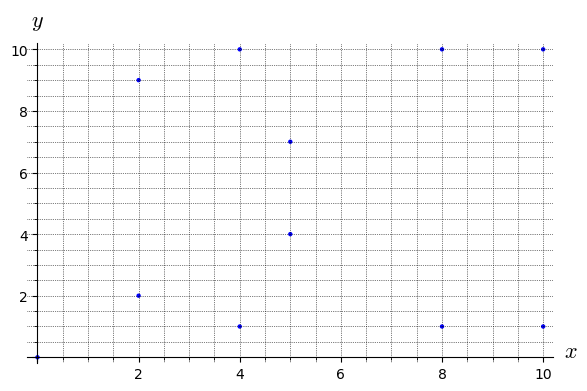

In [8]:
E20G11.plot(axes_labels=[r'$x$', r'$y$'], gridlines='minor')

## Example of manual procedure

this is for the demonstration how the Elliptic Curve is calculated on $Z/pZ$ field

In [9]:
def ec(points):
    return points**3 - 2*points

Nmod = 11
ns = np.array(range(Nmod)); print(ns)
fys = np.mod(ns**2, Nmod); print(fys)
fxs = np.mod(ec(ns), Nmod); print(ec(ns));print(fxs)

[ 0  1  2  3  4  5  6  7  8  9 10]
[0 1 4 9 5 3 3 5 9 4 1]
[  0  -1   4  21  56 115 204 329 496 711 980]
[ 0 10  4 10  1  5  6 10  1  7  1]


In [10]:
x_fys = dict(list(zip(ns,fys)))
x_ys = dict()
num_points = 0
print("n  Fy Fx  Ys")
print("== == === ========")
for i,fy,fx in zip(ns,fys,fxs):
    x_ys[i] = [k for k,v in x_fys.items() if v == fx] 
    num_points += len(x_ys[i])
    print(f"{i:<3}{fy:<3}{fx:<3}",([k for k,v in x_fys.items() if v == fx]))
print(f"total {num_points} points")

n  Fy Fx  Ys
== == === ========
0  0  0   [0]
1  1  10  []
2  4  4   [2, 9]
3  9  10  []
4  5  1   [1, 10]
5  3  5   [4, 7]
6  3  6   []
7  5  10  []
8  9  1   [1, 10]
9  4  7   []
10 1  1   [1, 10]
total 11 points


## Bitcoin Example

[Bitcoin](https://en.bitcoin.it/wiki/Secp256k1) uses [secp256k1](https://www.secg.org/sec2-v2.pdf) defined by secg with the so-called sextuple parameters T = (p,a,b,G,n,h) as below


- p = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE FFFFFC2F ($2^{256} - 2^{32} - 2^9 - 2^8 - 2^7 - 2^6 - 2^4 - 1$)
- $a_4$ = 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
- $a_6$ = 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000007
- G = 04 79BE667E F9DCBBAC 55A06295 CE870B07 029BFCDB 2DCE28D9 59F2815B 16F81798 | 483ADA77 26A3C465 5DA4FBFC 0E1108A8 FD17B448 A6855419 9C47D08F FB10D4B8 (02:only x; 04:x&y)
- n = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE BAAEDCE6 AF48A03B BFD25E8C D0364141 (available points)
- h = 01


In [11]:
p = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F 
a4 = 0
a6 = 7
G = (0x79BE667EF9DCBBAC55A06295CE870B07029BFCDB2DCE28D959F2815B16F81798, 0x483ADA7726A3C4655DA4FBFC0E1108A8FD17B448A68554199C47D08FFB10D4B8)
n = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141
h = 1

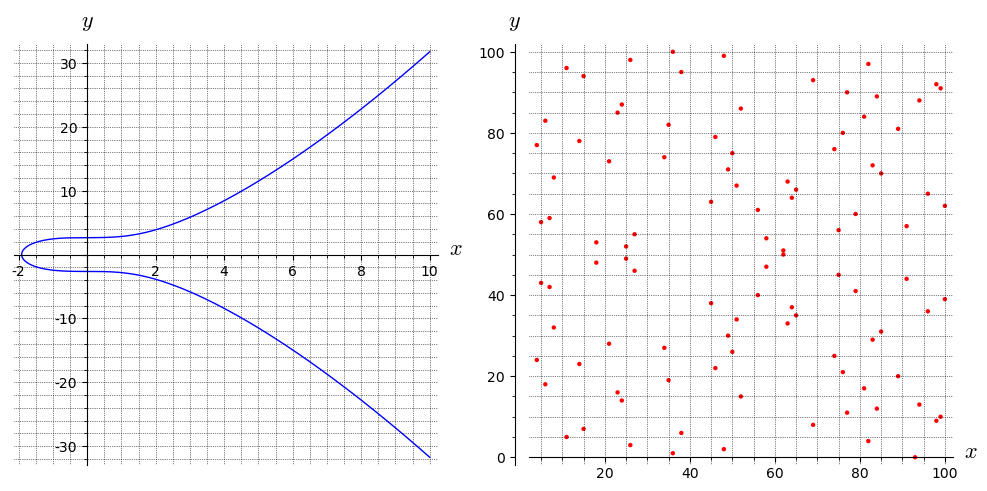

In [12]:
# how the curve looks like in RR, and in GF(101)
E_R = EllipticCurve([a4,a6])
E_R_plot = E_R.plot(xmax=10, color='blue', axes_labels=[r'$x$', r'$y$'], gridlines='minor')
E_GF101 = EllipticCurve(GF(101), [a4,a6])
E_GF101_plot = E_GF101.plot(color='red', axes_labels=[r'$x$', r'$y$'], gridlines='minor')

ga = graphics_array([E_R_plot, E_GF101_plot])
ga.show(figsize=[10,5])

In [13]:
F = GF(p)
E = EllipticCurve(F,[a4,a6]); print(E)
# verify the order (total points number)
print(E.order() == F(n))
# define the base point
base = E(G); print(base[:-1])

# calculate my public key
my_secret = 1782367834769380189238642398747864328903426732738
my_public_key = my_secret*base; print(my_public_key[:-1])

Elliptic Curve defined by y^2 = x^3 + 7 over Finite Field of size 115792089237316195423570985008687907853269984665640564039457584007908834671663
True
(55066263022277343669578718895168534326250603453777594175500187360389116729240, 32670510020758816978083085130507043184471273380659243275938904335757337482424)
(113511945368423717848529761969911510445251080690524528148960100048570224393597, 73606647278397705222871980332931963798626305691084075376143092648174358389352)


## Statistics of Elliptic Curve

the total points available for the defined Elliptic Curve on $Z/pZ$ field, and their distribution

be aware infinity $\infty$ is counted as a valid point, and treated as Identity of the group. with relations:

$$ \begin{align} P + \infty & = P \\
P + (-P) & = \infty \\
\end{align} $$

geometric meaning is that a vertical line intercepting two points $P$ and $-P$ will have the 3rd intercept poing with the curve at $\infty$. It also means that $P$ and $-P$ are the inverse of each other against the identity of $\infty$

In [14]:
print("mod  total points")
print("===  ============")
for i in list(primes(100)):
    print(f"{i:<4} {E20.Np(i)}")

mod  total points
===  ============
2    3
3    4
5    10
7    8
11   12
13   18
17   20
19   20
23   24
29   34
31   32
37   26
41   52
43   44
47   48
53   58
59   60
61   50
67   68
71   72
73   80
79   80
83   84
89   80
97   116


In [15]:
ap_list = []
for i in list(primes(100000)):
    ap_list.append(E20.ap(i))

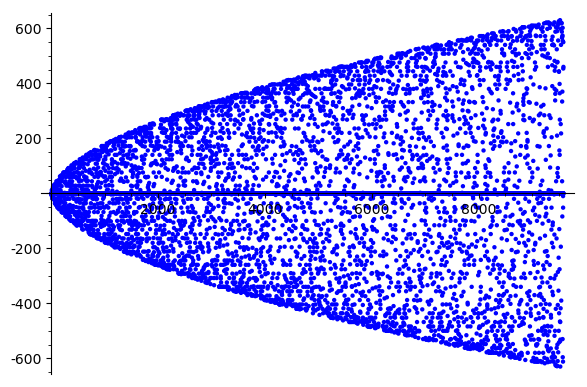

In [16]:
list_plot(np.array(ap_list))